Data Source: https://www.seanoe.org/data/00785/89673/


In [7]:
!pip install xroms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.6 MB/s eta 0:00:00


In [19]:
import xarray as xr
import xroms
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

In [27]:
roms_dataset = xr.open_mfdataset("/content/95126.nc")

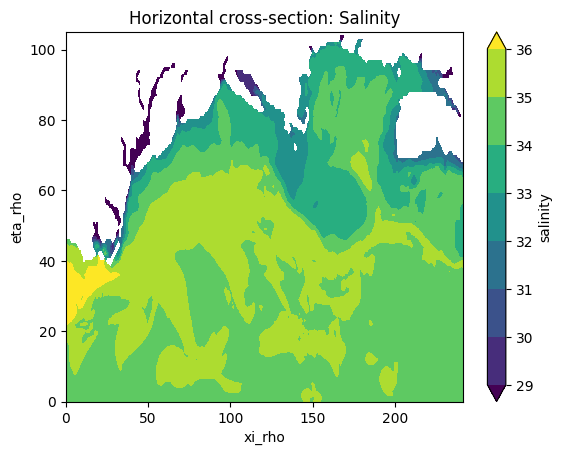

In [32]:
roms_dataset.salt.isel(ocean_time=0, s_rho=7).plot.contourf(x='xi_rho', y= 'eta_rho', robust=True)
plt.title('Horizontal cross-section: Salinity')
plt.show()

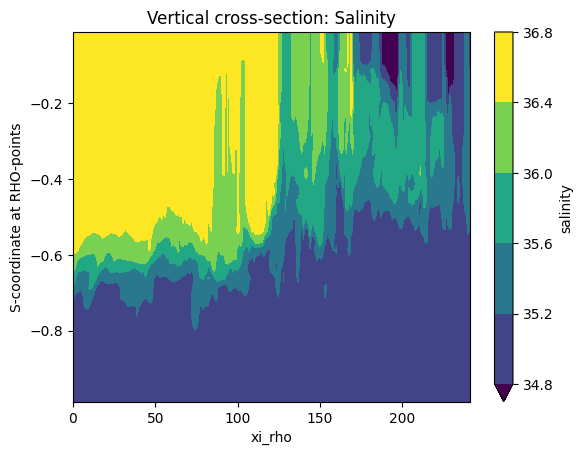

In [33]:
roms_dataset.salt.isel(ocean_time=0, eta_rho=18).plot.contourf(x='xi_rho', y= 's_rho', robust=True)
plt.title("Vertical cross-section: Salinity")
plt.show()

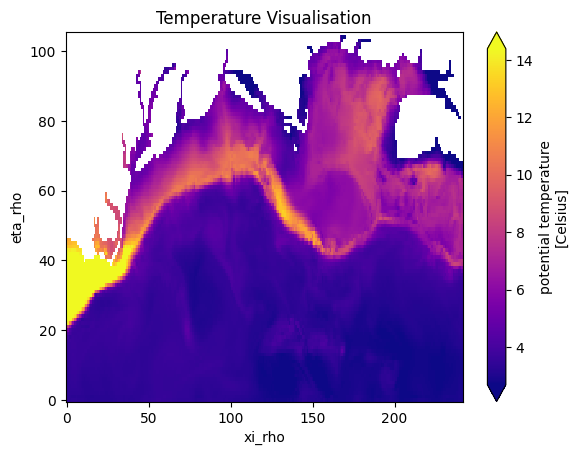

In [30]:
roms_dataset.temp.isel(ocean_time=0, s_rho=7).plot(x='xi_rho', y= 'eta_rho', robust=True, cmap='plasma')
plt.title('Temperature Visualisation')
plt.show()

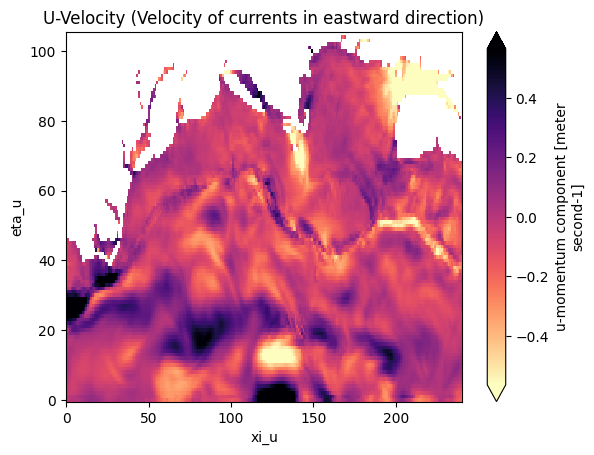

In [34]:
roms_dataset.u.isel(ocean_time=0, s_rho=7).plot(x='xi_u', y= 'eta_u', robust=True,cmap="magma_r")
plt.title('U-Velocity (Velocity of currents in eastward direction)')
plt.show()

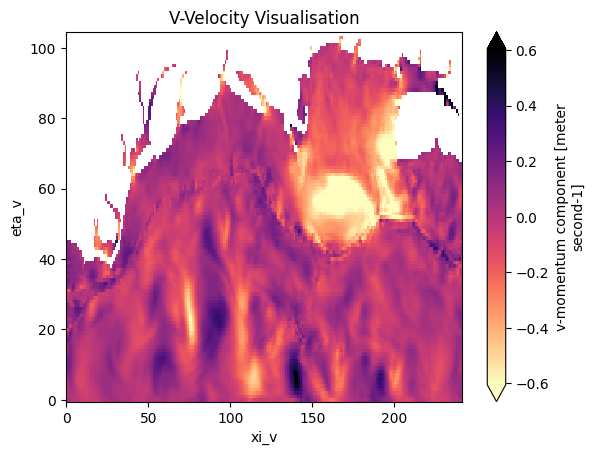

In [120]:
roms_dataset.v.isel(ocean_time=0, s_rho=7).plot(x='xi_v', y= 'eta_v', robust=True,cmap="magma_r")
plt.title('V-Velocity Visualisation')
plt.show()

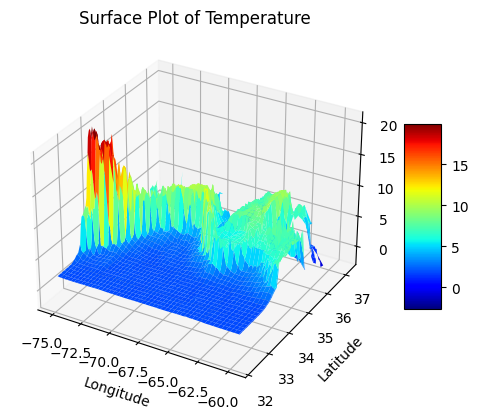

In [130]:
# Extract relevant data
temperature = roms_dataset.variables['temp'][0, 0, :, :]  # Example slice at ocean_time=0 and s_rho=0
lon = roms_dataset.variables['lon_rho'][:]
lat = roms_dataset.variables['lat_rho'][:]

# Generate 2D meshgrid for longitude and latitude
lon_2d, lat_2d = np.meshgrid(lon[0, :], lat[:, 0])

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(lon_2d, lat_2d, temperature, cmap='jet')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temperature')
ax.set_title('Surface Plot of Temperature')


# Show plot
plt.show()